In [140]:
import pandas as pd

# URL of the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"

# Load the dataset
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!

First 5 rows:
          package_name                                             review  \
0  com.facebook.katana   privacy at least put some option appear offli...   
1  com.facebook.katana   messenger issues ever since the last update, ...   
2  com.facebook.katana   profile any time my wife or anybody has more ...   
3  com.facebook.katana   the new features suck for those of us who don...   
4  com.facebook.katana   forced reload on uploading pic on replying co...   

   polarity  
0         0  
1         0  
2         0  
3         0  
4         0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


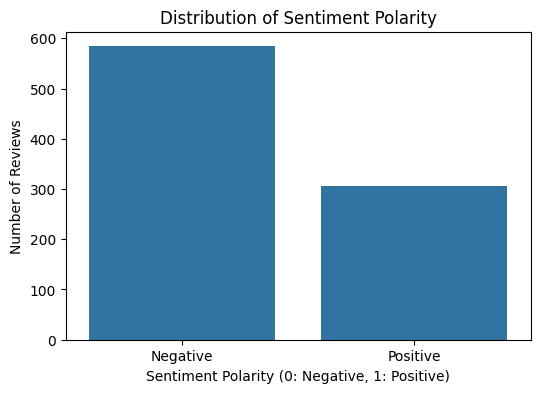

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of sentiment classes
plt.figure(figsize=(6, 4))
sns.countplot(x='polarity', data=df)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity (0: Negative, 1: Positive)')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


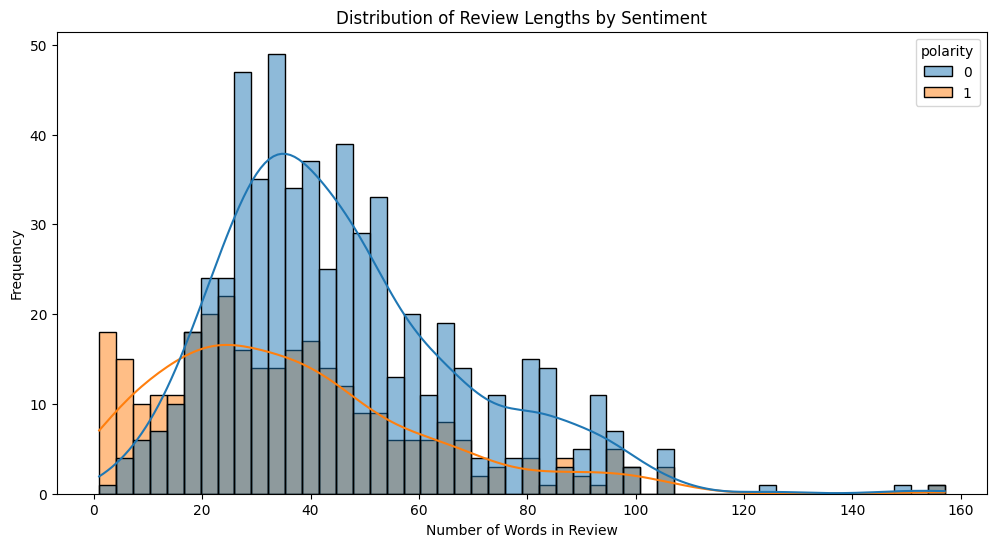

In [142]:
# Calculate review length (number of words)
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='review_length', hue='polarity', kde=True, bins=50)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()

In [143]:
from collections import Counter
import re # Import regex for cleaning

def clean_text_simple(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text) # Remove non-alphabetic characters
    return text.split()

# Separate reviews by polarity
negative_reviews = df[df['polarity'] == 0]['review']
positive_reviews = df[df['polarity'] == 1]['review']

# Combine all words for each sentiment
all_negative_words = [word for review in negative_reviews for word in clean_text_simple(review)]
all_positive_words = [word for review in positive_reviews for word in clean_text_simple(review)]

# Count word frequencies (excluding common English stop words)

from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

negative_word_counts = Counter([word for word in all_negative_words if word not in stop_words and len(word) > 1])
positive_word_counts = Counter([word for word in all_positive_words if word not in stop_words and len(word) > 1])


print("\nMost Common Negative Words (excluding stop words):")
print(negative_word_counts.most_common(20)) # Display top 20

print("\nMost Common Positive Words (excluding stop words):")
print(positive_word_counts.most_common(20)) # Display top 20


Most Common Negative Words (excluding stop words):
[('app', 270), ('update', 163), ('cant', 141), ('fix', 129), ('please', 124), ('new', 113), ('dont', 102), ('time', 99), ('get', 91), ('one', 87), ('like', 86), ('even', 85), ('use', 85), ('doesnt', 84), ('game', 79), ('phone', 72), ('back', 72), ('good', 70), ('work', 64), ('version', 63)]

Most Common Positive Words (excluding stop words):
[('app', 155), ('game', 87), ('great', 84), ('good', 71), ('love', 56), ('like', 53), ('use', 47), ('best', 45), ('one', 41), ('browser', 40), ('really', 39), ('dont', 31), ('would', 29), ('new', 28), ('apps', 28), ('well', 27), ('keep', 27), ('better', 26), ('please', 26), ('fun', 26)]


In [144]:
# Check unique values in the 'polarity' column
print("\nUnique values in 'polarity' column:")
print(df['polarity'].unique())

# Check the count of each unique value
print("\nValue counts in 'polarity' column:")
print(df['polarity'].value_counts())


Unique values in 'polarity' column:
[0 1]

Value counts in 'polarity' column:
polarity
0    584
1    307
Name: count, dtype: int64


In [145]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
nltk.download('stopwords') 

# Define features (X) and target (y)
X = df['review']
y = df['polarity']

# Initialize CountVectorizer

vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit the vectorizer on the training data and transform the text

X_vectorized = vectorizer.fit_transform(X)

print("\nOriginal number of reviews:", X.shape[0])
print("Shape of the vectorized features (reviews, vocabulary_size):", X_vectorized.shape)
print("Number of unique words in the vocabulary:", len(vectorizer.vocabulary_))


Original number of reviews: 891
Shape of the vectorized features (reviews, vocabulary_size): (891, 3721)
Number of unique words in the vocabulary: 3721


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42) # Using a random_state for reproducibility

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 3721)
Shape of X_test: (179, 3721)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [147]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model using the training data
print("Training the Naive Bayes model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the Naive Bayes model...
Model training complete!


In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # Default is binary, positive label is 1
recall = recall_score(y_test, y_pred)     # Default is binary, positive label is 1
f1 = f1_score(y_test, y_pred)           # Default is binary, positive label is 1
cm = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


Model Evaluation on Test Set:
Accuracy: 0.7765
Precision: 0.6226
Recall: 0.6226
F1-Score: 0.6226

Confusion Matrix:
[[106  20]
 [ 20  33]]


In [152]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

hyperparams = {
    "alpha": np.linspace(0.01, 10.0, 200),
    "fit_prior": [True, False]
}

# We initialize the random search

random_search = RandomizedSearchCV(model, hyperparams, n_iter = 50, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=50,
                   param_distributions={'alpha': array([ 0.01      ,  0.06020101,  0.11040201,  0.16060302,  0.21080402,
        0.26100503,  0.31120603,  0.36140704,  0.41160804,  0.46180905,
        0.51201005,  0.56221106,  0.61241206,  0.66261307,  0.71281407,
        0.76301508,  0.81321608,  0.86341709,  0.91361809,  0.9638191 ,
        1.0140201 ,  1.06422111,  1.11442211,  1.1646231...
        8.54417085,  8.59437186,  8.64457286,  8.69477387,  8.74497487,
        8.79517588,  8.84537688,  8.89557789,  8.94577889,  8.9959799 ,
        9.0461809 ,  9.09638191,  9.14658291,  9.19678392,  9.24698492,
        9.29718593,  9.34738693,  9.39758794,  9.44778894,  9.49798995,
        9.54819095,  9.59839196,  9.64859296,  9.69879397,  9.74899497,
        9.79919598,  9.84939698,  9.89959799,  9.94979899, 10.        ]),
                                        'fit_prior': [True, False]},
                   random_state=42, scoring='accuracy')

In [150]:
print("Starting RandomizedSearchCV for hyperparameter tuning...")
random_search.fit(X_train, y_train)

print("RandomizedSearchCV complete.")

# Get the best parameters and best score found
print("\nBest hyperparameters found:")
print(random_search.best_params_)
print("\nBest cross-validation accuracy:")
print(random_search.best_score_)


Starting RandomizedSearchCV for hyperparameter tuning...


RandomizedSearchCV complete.

Best hyperparameters found:
{'fit_prior': True, 'alpha': np.float64(1.0642211055276383)}

Best cross-validation accuracy:
0.8188023244361272


In [151]:
# The best model found by the search
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

print("\nModel Evaluation on Test Set (Hyperparameter Tuned):")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")
print("\nConfusion Matrix (Hyperparameter Tuned):")
print(cm_tuned)


Model Evaluation on Test Set (Hyperparameter Tuned):
Accuracy: 0.7709
Precision: 0.6154
Recall: 0.6038
F1-Score: 0.6095

Confusion Matrix (Hyperparameter Tuned):
[[106  20]
 [ 21  32]]
